**<h1>Manga AI 4x Upscale<h1>**

Version: 1.2 [2023/08/25]
<br>Notebook author: Spladenly
<br><br>"4x_eula_digimanga_bw_v2_nc1_307k" is an AI model that was made specifically for manga upscaling. The result is very interesting and unlike waifu2x, the output files aren't large. This model requires a fairly powerful Nvidia GPU (unfortunately, ESRGAN does not support AMD GPUs). So, this notebook will give you the opportunity to run this model on Google's servers using their free and powerful GPU.
<br><br>It's also possible to upscale color pages using the "4x-AnimeSharp" model.
<br><br>The following projects were used: ESRGAN by joeyballentine and AI models: “4x_eula_digimanga_bw_v2_nc1_307k” by “end user license agreement#9756”, and “4x-AnimeSharp“ by Kim2091, licensed under [CC-BY-NC-SA-4.0](https://creativecommons.org/licenses/by-nc-sa/4.0).

---

> Important: When running the script, you will need to grant access to your Google Drive. This permission will be used exclusively to access the folder: "/ESRGAN". No other personal folders or files will be ever used.

The folder structure on Google Drive:

/ESRGAN/input (black-and-white manga pages should be uploaded here; they can also be uploaded to subfolders) *
<br>/ESRGAN/input-color (color manga pages should be uploaded here; they can also be uploaded to subfolders) *
<br>/ESRGAN/output (black-and-white manga pages will appear here after upscaling)
<br>/ESRGAN/output-color (color manga pages will appear here after upscaling)
<br><br> * Supported files: bmp, dib, jpeg, jpg, jpe, jp2, png, webp, pbm, pgm, ppm, pxm, pnm, pfm, sr, ras, tiff, tif, exr, hdr, pic, gif, tga.
> Please note: Google Drive has a delay. If you have just uploaded or deleted files, Google Colab may not see the changes for up to 1 minute. It works the same way in the other direction. If processing has just finished, you won't see the new files on Google Drive right away. Please wait.

To run the script, just click on this button (which is below the illustrative screenshot).

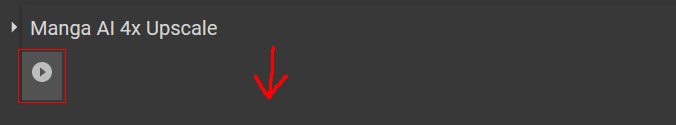

In [ ]:
#@title Manga AI 4x Upscale

import os
import torch
from google.colab import drive
from pathlib import Path

def init_dirs():
  Path("/content/gdrive/MyDrive/ESRGAN").mkdir \
   (parents=True, exist_ok=True)
  Path("/content/gdrive/MyDrive/ESRGAN/input").mkdir \
   (parents=True, exist_ok=True)
  Path("/content/gdrive/MyDrive/ESRGAN/output").mkdir \
   (parents=True, exist_ok=True)
  Path("/content/gdrive/MyDrive/ESRGAN/input-color").mkdir \
   (parents=True, exist_ok=True)
  Path("/content/gdrive/MyDrive/ESRGAN/output-color").mkdir \
   (parents=True, exist_ok=True)

# Checks recursively whether a folder contains any files
def dir_contains_files(path):
  for root, dirs, files in os.walk(path):
    if files:
      return True
  return False

def ai_process():
  !python ESRGAN/upscale.py -se -i /content/gdrive/MyDrive/ESRGAN/input \
  -o /content/gdrive/MyDrive/ESRGAN/output \
  ESRGAN/models/4x_eula_digimanga_bw_v2_nc1_307k.pth
  !python ESRGAN/upscale.py -se -i /content/gdrive/MyDrive/ESRGAN/input-color \
  -o /content/gdrive/MyDrive/ESRGAN/output-color \
  ESRGAN/models/4x-AnimeSharp.pth

# For easier localization
gdrive_connecting_text = "Google Drive connection in progress..."
gpu_not_available_text = "This session doesn't have a GPU.\n \
To connect a GPU, click:\n'Edit' -> 'Notebook settings' -> \
'Hardware accelerator' = GPU; 'GPU type' = T4.\nAfter that, run this \
script again."
created_dirs_text = "The folders '/ESRGAN/input', '/ESRGAN/input-color', \
'/ESRGAN/output' and '/ESRGAN/output-color' have been created on your Google \
Drive.\nPlease upload the manga pages to '/ESRGAN/input' and/or \
'/ESRGAN/input-color' and run this script again."
no_pages_found_text = "No pages were found in the folders: '/ESRGAN/input' \
and '/ESRGAN/input-color' on your Google Drive.\nPlease upload manga \
pages there, and run this script again."
finished_ai_text = "The processing has been finished. The result can be \
downloaded from '/ESRGAN/output' and/or '/ESRGAN/output-color' on your Google \
Drive.\nTo process additional pages, run this script again. If you don't \
plan to process additional pages in the near future, please close the current \
session.\nThis can be done by clicking on: the inverted triangle (next to \
the 'RAM' and 'Disk' labels in the upper right corner) -> 'Disable and remove \
runtime'.\nThis will unlock the resources reserved for this session for \
other users."

def main():
  if not torch.cuda.is_available():
    print(gpu_not_available_text)
    return

  if not os.path.exists('/content/gdrive/MyDrive'):
    print(gdrive_connecting_text)
    drive.mount('/content/gdrive')

  if not os.path.exists('ESRGAN'):
    !git clone https://github.com/Spladenly/ESRGAN

  if not os.path.exists('/content/gdrive/MyDrive/ESRGAN'):
    init_dirs()
    print(created_dirs_text)
    return

  if not ((dir_contains_files('/content/gdrive/MyDrive/ESRGAN/input') or \
           dir_contains_files('/content/gdrive/MyDrive/ESRGAN/input-color'))):
    print(no_pages_found_text)
    return

  ai_process()

  print(finished_ai_text)

if __name__ == '__main__':
  main()


Although, you can immediately upload images directly to the /ESRGAN/input and  /ESRGAN/input-color folders, if you need to process a large amount of pages, due to technical reasons, it's faster to upload archives, rather than 100+ files. So, optionally, you can upload ZIP and CBZ files to the /ESRGAN/input and /ESRGAN/input-color folders and run the following script. It will unzip all the ZIP and CBZ files (into separate folders) and move the original ZIP and CBZ files to the recycle bin.

In [ ]:
#@title Extract all ZIP and CBZ files in the /ESRGAN/input and /ESRGAN/input-color folders

import os
import shutil
import zipfile
from google.colab import drive

# For easier localization
gdrive_connecting_text = "Google Drive connection in progress..."
found_text = "Found"
files_text = "file(s)."
extracting_text = "Unpacking..."
done_text = "Done."
current_dir_text = "Current folder:"

def unpack(input_dir):
  if not os.path.exists('/content/gdrive/MyDrive'):
    print(gdrive_connecting_text)
    drive.mount('/content/gdrive')

  zip_files = [f for f in os.listdir(input_dir) if f.endswith('.zip') or \
               f.endswith('.cbz')]

  print(f"{found_text} {len(zip_files)} {files_text}")
  print(extracting_text)

  for zip_file in zip_files:
      zip_path = os.path.join(input_dir, zip_file)

      extract_folder = os.path.join(input_dir, \
                                    os.path.splitext(zip_file)[0])
      os.makedirs(extract_folder, exist_ok=True)

      with zipfile.ZipFile(zip_path, 'r') as zf:
          zf.extractall(extract_folder)

      os.remove(zip_path)

def main():
  input_dir = '/content/gdrive/MyDrive/ESRGAN/input'
  input_color_dir = '/content/gdrive/MyDrive/ESRGAN/input-color'

  print(f"{current_dir_text} {input_dir}")
  unpack(input_dir)

  print(f"{current_dir_text} {input_color_dir}")
  unpack(input_color_dir)

  print(done_text)

if __name__ == '__main__':
  main()